In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-delay-prediction-zindi/Train (12).csv
/kaggle/input/flight-delay-prediction-zindi/Test (6).csv
/kaggle/input/flight-delay-prediction-zindi/SampleSubmission (6).csv


In [90]:
train=pd.read_csv("/kaggle/input/flight-delay-prediction-zindi/Train (12).csv")
train

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0


/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


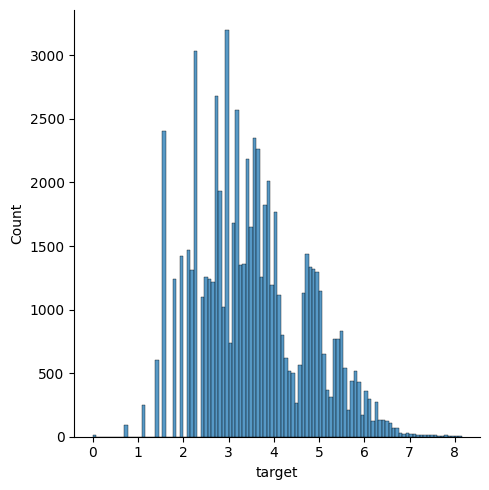

In [91]:
import seaborn as sns 
sns.displot(np.log(train["target"]))


In [92]:
train["target"].min()

0.0

In [93]:
test=pd.read_csv("/kaggle/input/flight-delay-prediction-zindi/Test (6).csv")
test

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ
...,...,...,...,...,...,...,...,...,...
9328,test_id_9328,2018-09-12,TU 0998,TUN,NCE,2018-09-12 14:15:00,2018-09-12 15.45.00,ATA,TU 320IMV
9329,test_id_9329,2018-09-27,WKL 0000,TUN,TUN,2018-09-27 22:00:00,2018-09-28 01.00.00,SCH,TU 32AIMG
9330,test_id_9330,2018-09-03,UG 1601,SJJ,TUN,2018-09-03 09:20:00,2018-09-03 11.10.00,SCH,TU CR9ISA
9331,test_id_9331,2018-09-15,UG 0008,TUN,DJE,2018-09-15 14:30:00,2018-09-15 15.30.00,SCH,UG AT7LBD


In [94]:
all_data=pd.concat([train,test])
all_data

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
...,...,...,...,...,...,...,...,...,...,...
9328,test_id_9328,2018-09-12,TU 0998,TUN,NCE,2018-09-12 14:15:00,2018-09-12 15.45.00,ATA,TU 320IMV,NaN
9329,test_id_9329,2018-09-27,WKL 0000,TUN,TUN,2018-09-27 22:00:00,2018-09-28 01.00.00,SCH,TU 32AIMG,NaN
9330,test_id_9330,2018-09-03,UG 1601,SJJ,TUN,2018-09-03 09:20:00,2018-09-03 11.10.00,SCH,TU CR9ISA,NaN
9331,test_id_9331,2018-09-15,UG 0008,TUN,DJE,2018-09-15 14:30:00,2018-09-15 15.30.00,SCH,UG AT7LBD,NaN


In [95]:
all_data['STD'] = pd.to_datetime(all_data['STD'])
all_data["STD_Date"]=all_data["STD"].dt.date               
all_data["STD_Year"]=all_data["STD"].dt.year
all_data['STD_Months']= all_data['STD'].dt.month
all_data['STD_Day']= all_data['STD'].dt.day
all_data['STD_Hours']= all_data['STD'].dt.hour
all_data['STD_Minutes']= all_data['STD'].dt.minute

all_data['STA'] = pd.to_datetime(all_data['STA'], format='%Y-%m-%d %H.%M.%S')
all_data["STA_Date"]=all_data["STA"].dt.date               
all_data["STA_Year"]=all_data["STA"].dt.year
all_data['STA_Months']= all_data['STA'].dt.month
all_data['STA_Day']= all_data['STA'].dt.day
all_data['STA_Hours']= all_data['STA'].dt.hour
all_data['STA_Minutes']= all_data['STA'].dt.minute


In [96]:
all_data

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,...,STD_Months,STD_Day,STD_Hours,STD_Minutes,STA_Date,STA_Year,STA_Months,STA_Day,STA_Hours,STA_Minutes
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,...,1,3,10,30,2016-01-03,2016,1,3,12,55
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,...,1,13,15,5,2016-01-13,2016,1,13,16,55
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,...,1,16,4,10,2016-01-16,2016,1,16,6,45
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,...,1,17,14,10,2016-01-17,2016,1,17,17,0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,...,1,17,14,30,2016-01-17,2016,1,17,15,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9328,test_id_9328,2018-09-12,TU 0998,TUN,NCE,2018-09-12 14:15:00,2018-09-12 15:45:00,ATA,TU 320IMV,NaN,...,9,12,14,15,2018-09-12,2018,9,12,15,45
9329,test_id_9329,2018-09-27,WKL 0000,TUN,TUN,2018-09-27 22:00:00,2018-09-28 01:00:00,SCH,TU 32AIMG,NaN,...,9,27,22,0,2018-09-28,2018,9,28,1,0
9330,test_id_9330,2018-09-03,UG 1601,SJJ,TUN,2018-09-03 09:20:00,2018-09-03 11:10:00,SCH,TU CR9ISA,NaN,...,9,3,9,20,2018-09-03,2018,9,3,11,10
9331,test_id_9331,2018-09-15,UG 0008,TUN,DJE,2018-09-15 14:30:00,2018-09-15 15:30:00,SCH,UG AT7LBD,NaN,...,9,15,14,30,2018-09-15,2018,9,15,15,30


In [97]:
all_data2=all_data.drop(columns=["ID","DATOP","STD","STA","target"])
c_features=all_data2.columns[all_data2.dtypes==object]
c_features


Index(['FLTID', 'DEPSTN', 'ARRSTN', 'STATUS', 'AC', 'STD_Date', 'STA_Date'], dtype='object')

In [98]:
#Encoding process
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
for i in c_features:
    all_data2[i]=le.fit_transform(all_data2[i])

In [99]:
all_data2.isna().sum()

FLTID          0
DEPSTN         0
ARRSTN         0
STATUS         0
AC             0
STD_Date       0
STD_Year       0
STD_Months     0
STD_Day        0
STD_Hours      0
STD_Minutes    0
STA_Date       0
STA_Year       0
STA_Months     0
STA_Day        0
STA_Hours      0
STA_Minutes    0
dtype: int64

In [100]:
train_2=all_data2[:len(train)]
test_2=all_data2[len(train):]

In [101]:
#k-fold 교차검증 
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)


In [102]:
#y = train['target']
#straftified k-fold는 정답칼럼을 기준으로 균등하게 뽑는다
#train_index 와 valid_index 
#result=0
#내부점수확인용
#best_score=0

#from catboost import CatBoostRegressor
#cbc=CatBoostRegressor(learning_rate=0.1,verbose=100)

#for train_index, valid_index in skf.split(train_2, train['target']) :
    #x_train 그리고 x_valid 는 겹치지 않고 들어간다 
    #x_train = train_2.iloc[train_index]
    #x_valid = train_2.iloc[valid_index]
    #y_train = y[train_index]
    #y_valid = y[valid_index]
    #cbc.fit(x_train,y_train,eval_set=(x_valid,y_valid),early_stopping_rounds=50)
    #result 에 축적해야한다 (result는 5번 담긴다)
    #best_score+=cbc.best_score/5
    #result+=cbc.predict(test_2)/5
    #result 에 나누기 5를 해야 평균이 나온다 그걸 가지고 result 제출해야한다 / train,test,split 는 데이터를 최대한 사용못한다 그러니 교차검증을 꼭 써야한다 
    #각 학습마다 최적의 가중치를 가지고 result 에 담긴다 / 앙상블기법쓰임
#result


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 114.0848054	test: 125.7849576	best: 125.7849576 (0)	total: 11.3ms	remaining: 11.3s
100:	learn: 106.9717828	test: 120.3141213	best: 120.3141213 (100)	total: 974ms	remaining: 8.67s
200:	learn: 104.0399607	test: 118.7937715	best: 118.7937715 (200)	total: 2.21s	remaining: 8.79s
300:	learn: 101.7797569	test: 117.8320247	best: 117.8256437 (299)	total: 3.31s	remaining: 7.7s
400:	learn: 99.8153955	test: 116.8389756	best: 116.8389756 (400)	total: 4.28s	remaining: 6.39s
500:	learn: 98.2136689	test: 116.2421625	best: 116.2395363 (499)	total: 5.23s	remaining: 5.21s
600:	learn: 96.7262838	test: 115.5782817	best: 115.5782817 (600)	total: 6.24s	remaining: 4.14s
700:	learn: 95.4344400	test: 115.0465042	best: 115.0465042 (700)	total: 7.19s	remaining: 3.06s
800:	learn: 94.1947606	test: 114.8032563	best: 114.8032563 (800)	total: 8.15s	remaining: 2.02s
900:	learn: 93.0198747	test: 114.4406006	best: 114.4400763 (894)	total: 9.12s	remaining: 1s
999:	learn: 91.9466537	test: 114.2796892	best: 114.27

array([ 16.38267505,  38.11221628,  18.69611606, ...,   4.91452546,
        -8.47481895, -11.73383235])

In [112]:
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold  # Using KFold for regression tasks
from sklearn.model_selection import train_test_split

#Assuming train_2 is your features dataframe and train['target'] is the target series
X = train_2
y = np.log(train['target'].clip(lower=1))
 # Applying log transformation to your target variable

# Initial setup
result = 0
best_score = 0
cbc = CatBoostRegressor(
    learning_rate=0.1,
    verbose=100,
    bootstrap_type='Bernoulli'  # Changing bootstrap_type to Bernoulli
    #subsample parameter can be adjusted if needed, depending on the bootstrap_type
)
# Using KFold instead of StratifiedKFold because this is a regression task
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

for train_index, valid_index in kf.split(X):
    # Splitting the data
    x_train, x_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

    # Fitting the model
    cbc.fit(x_train, y_train, eval_set=(x_valid, y_valid), early_stopping_rounds=50)

    # Accumulating the predictions
    result += cbc.predict(test_2) / 5

# Assuming test_2 is correctly defined and matches the dimensionality of X

0:	learn: 1.8973111	test: 1.8887195	best: 1.8887195 (0)	total: 8.42ms	remaining: 8.41s
100:	learn: 1.5226469	test: 1.5263152	best: 1.5263152 (100)	total: 821ms	remaining: 7.3s
200:	learn: 1.4778318	test: 1.4880564	best: 1.4880564 (200)	total: 1.64s	remaining: 6.5s
300:	learn: 1.4505802	test: 1.4687683	best: 1.4687683 (300)	total: 2.46s	remaining: 5.71s
400:	learn: 1.4308703	test: 1.4562906	best: 1.4562906 (400)	total: 3.28s	remaining: 4.9s
500:	learn: 1.4148617	test: 1.4470620	best: 1.4470620 (500)	total: 4.14s	remaining: 4.12s
600:	learn: 1.4012326	test: 1.4401303	best: 1.4401303 (600)	total: 5.03s	remaining: 3.34s
700:	learn: 1.3891422	test: 1.4350125	best: 1.4350125 (700)	total: 5.87s	remaining: 2.5s
800:	learn: 1.3780704	test: 1.4303617	best: 1.4303617 (800)	total: 6.72s	remaining: 1.67s
900:	learn: 1.3684922	test: 1.4272152	best: 1.4272152 (900)	total: 7.62s	remaining: 837ms
999:	learn: 1.3598935	test: 1.4242474	best: 1.4242399 (997)	total: 8.46s	remaining: 0us

bestTest = 1.42423

In [104]:
sub=pd.read_csv("/kaggle/input/flight-delay-prediction-zindi/SampleSubmission (6).csv")
sub

,ID,target
0,test_id_0,2470
1,test_id_1,2944
2,test_id_2,2585
3,test_id_3,3264
4,test_id_4,1369
...,...,...
9328,test_id_9328,2155
9329,test_id_9329,3444
9330,test_id_9330,921
9331,test_id_9331,130


In [115]:
sub["target"]=np.exp(result)
sub


,ID,target
0,test_id_0,3.475569
1,test_id_1,24.760395
2,test_id_2,7.718591
3,test_id_3,3.949900
4,test_id_4,9.377712
...,...,...
9328,test_id_9328,75.933340
9329,test_id_9329,1.619512
9330,test_id_9330,0.977240
9331,test_id_9331,0.944014


In [116]:
sub.to_csv("sub_3.csv",index=0)

